In [70]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt


dataset = pd.read_csv('train.csv')
datatest = pd.read_csv('test.csv')
for x in dataset.index:
    sex = str(dataset.loc[x, "Sex"])
    embarked = str(dataset.loc[x, "Embarked"])
    pclass = str(dataset.loc[x, "Pclass"])
    if ('female' in sex) == True:
        dataset.loc[x, "female"] = 1
        dataset.loc[x, "male"] = 0
    else: 
        dataset.loc[x, "male"] = 1
        dataset.loc[x, "female"] = 0
    if('C' in embarked) == True:
        dataset.loc[x, "Cherbourg"] = 1
        dataset.loc[x, "Queenstown"] = 0
        dataset.loc[x, "Southampton"] = 0
    elif('Q' in embarked) == True:
        dataset.loc[x, "Cherbourg"] = 0
        dataset.loc[x, "Queenstown"] = 1
        dataset.loc[x, "Southampton"] = 0
    elif('S' in embarked) == True:
        dataset.loc[x, "Cherbourg"] = 0
        dataset.loc[x, "Queenstown"] = 0
        dataset.loc[x, "Southampton"] = 1 
    if('1' in pclass) == True:
        dataset.loc[x, "1st"] = 1
        dataset.loc[x, "2nd"] = 0
        dataset.loc[x, "3rd"] = 0
    elif('2' in pclass) == True:
        dataset.loc[x, "1st"] = 0
        dataset.loc[x, "2nd"] = 1
        dataset.loc[x, "3rd"] = 0
    elif('3' in pclass) == True:
        dataset.loc[x, "1st"] = 0
        dataset.loc[x, "2nd"] = 0
        dataset.loc[x, "3rd"] = 1
print(dataset.head())

cleaned = dataset.dropna().replace('', None)


cleaned.to_csv('cleaned.csv', index=False)
print(cleaned.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  male  female  Cherbourg  \
0      0         A/5 21171   7.2500   NaN        S   1.0     0.0        0.0   
1      0          PC 17599  71.2833   C85        C   0.0     1.0        1.0   
2      0  STON/O2. 3101282   7.9250   NaN        S   0.0     1.0        0.0   
3   

In [71]:
def split_dataset(dataset, train_frac=0.7):
   train = dataset.sample(frac=train_frac)
   val = dataset.drop(train.index)
   return train, val

In [72]:

train, val = split_dataset(cleaned)


xtrain = train[['female', 'male', 'Cherbourg','Queenstown','Southampton','1st','2nd','3rd']]
ytrain = train['Survived']

xtest = val[['female', 'male', 'Cherbourg','Queenstown','Southampton','1st','2nd','3rd']]
ytest = val['Survived']

print(xtrain.shape)
print(ytrain.shape)



model = tf.keras.models.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(8,)))
model.add(tf.keras.layers.Dense(2000, activation='sigmoid'))
model.add(tf.keras.layers.Dense(1000, activation='sigmoid'))
model.add(tf.keras.layers.Dense(800, activation='sigmoid'))
model.add(tf.keras.layers.Dense(500, activation='sigmoid'))
model.add(tf.keras.layers.Dense(300, activation='sigmoid'))
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))
model.add(tf.keras.layers.Dense(1, activation='linear'))

print(model.summary())

loss = 'mse'
metric = 'mae'
epochs = 1000
model.compile(loss=loss, optimizer='sgd', metrics=[metric])
history = model.fit(xtrain, ytrain, epochs=epochs, batch_size=64, verbose=1, validation_data=(xtest, ytest))



(128, 8)
(128,)
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_75 (Dense)            (None, 2000)              18000     
                                                                 
 dense_76 (Dense)            (None, 1000)              2001000   
                                                                 
 dense_77 (Dense)            (None, 800)               800800    
                                                                 
 dense_78 (Dense)            (None, 500)               400500    
                                                                 
 dense_79 (Dense)            (None, 300)               150300    
                                                                 
 dense_80 (Dense)            (None, 100)               30100     
                                                                 
 dense_81 (Dense)            (None, 1

In [73]:
_, accuracy = model.evaluate(xtrain, ytrain)
print('Accuracy: %.2f' % (accuracy*100))

4/4 [==============================] - 0s 4ms/step - loss: 0.2259 - mae: 0.4570
Accuracy: 45.70


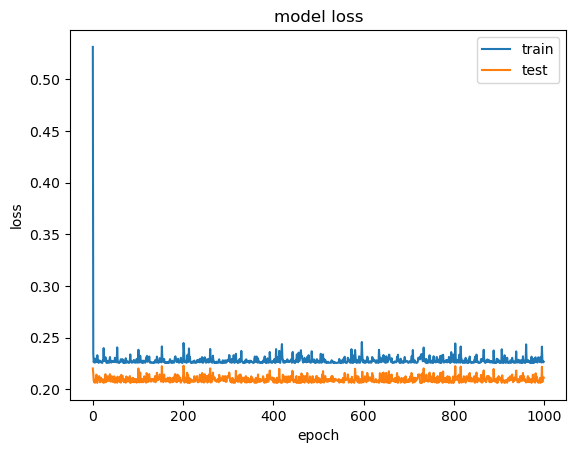

In [74]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()
